In [1]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.utils import resample

from scipy.stats import zscore

from pprint import pprint

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

concert_dataset = pd.read_csv("/Users/wei7614/Documents/Programming/Python"
                               "/ML/Kaggle/datasets/concrete/Concrete_Data.csv")
                              
concert_dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# 修改Colmun name (方便日後操作)
renamed_dataset = concert_dataset.rename(columns={"Cement (component 1)(kg in a m^3 mixture)" : "cement",
                                "Blast Furnace Slag (component 2)(kg in a m^3 mixture)" : "slag",
                                "Fly Ash (component 3)(kg in a m^3 mixture)": "ash",
                                "Water  (component 4)(kg in a m^3 mixture)" : "water",
                                "Superplasticizer (component 5)(kg in a m^3 mixture)" : "superplasticizer",
                                "Coarse Aggregate  (component 6)(kg in a m^3 mixture)" : "coaragg",
                                "Fine Aggregate (component 7)(kg in a m^3 mixture)" : "fineagg",
                                "Age (day)" : "age",
                                "Concrete compressive strength(MPa, megapascals) ": "strength"})
# cement(水泥) slag(礦渣) ash(灰) water(水) superplasticizer(塑化劑) 
# coaragg(骨料) fineagg(細骨科) age(天) strength(強度)
renamed_dataset.head(10)

,cement,slag,ash,water,superplasticizer,coaragg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [4]:
# 資料數以及維度
row_count, column_count = renamed_dataset.shape
print('total row count = ' + str(row_count))
print('total colum count = ' + str(column_count))

total row count = 1030
total colum count = 9


In [5]:
# data info
renamed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   ash               1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coaragg           1030 non-null   float64
 6   fineagg           1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


cement              0
slag                0
ash                 0
water               0
superplasticizer    0
coaragg             0
fineagg             0
age                 0
strength            0
dtype: int64

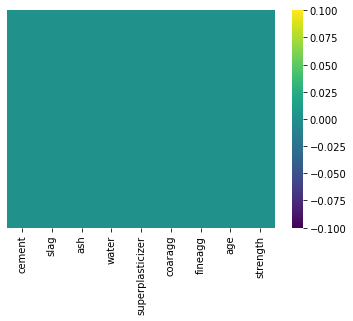

In [6]:
# 由data info裡面可知沒有null資料，所以不用為了缺失資料做特別處理
# 可以用熱點圖以及數據來確認這件事
sns.heatmap(renamed_dataset.isna(), yticklabels=False, cbar=True, cmap='viridis')
renamed_dataset.isnull().sum()

In [7]:
# data的統計資訊
renamed_dataset.describe()

,cement,slag,ash,water,superplasticizer,coaragg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
# 由統計資訊可以看出 cement , water , superplasticizer, coaragg, fineagg, strength的平均數(mean)很靠近中位數(median 50%)
# 由此可知以上的資料分布比較像 normal distribution
# 其他的features (slag, ash, age) 數據的中位數在平均數的左邊 -> right skewed
# 單從這樣看其實不太準，在之後個別feature做圖可以看到發現原因


<AxesSubplot:>

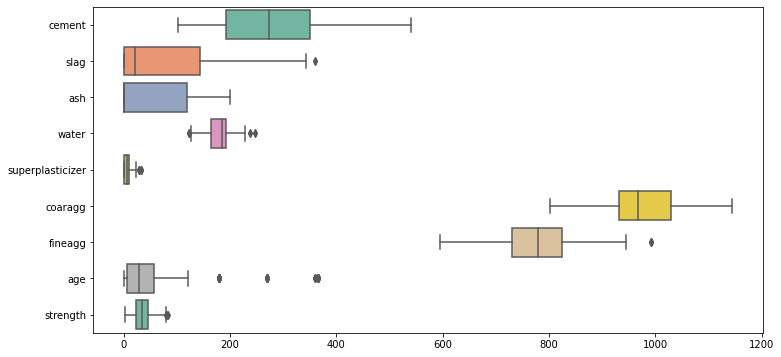

In [9]:
# 查看outliter
plt.figure(figsize=(12,6))
# orient = 'h' ->水平的圖, palette = 'Set2' -> 調色設成set 2, dodge是可以將hue區分的變數分成兩行
sns.boxplot(data=renamed_dataset, orient='h', palette='Set2', dodge=False)

#由圖可知slag, water, superplasticizer, finagg, age, strength 很明顯有outliter

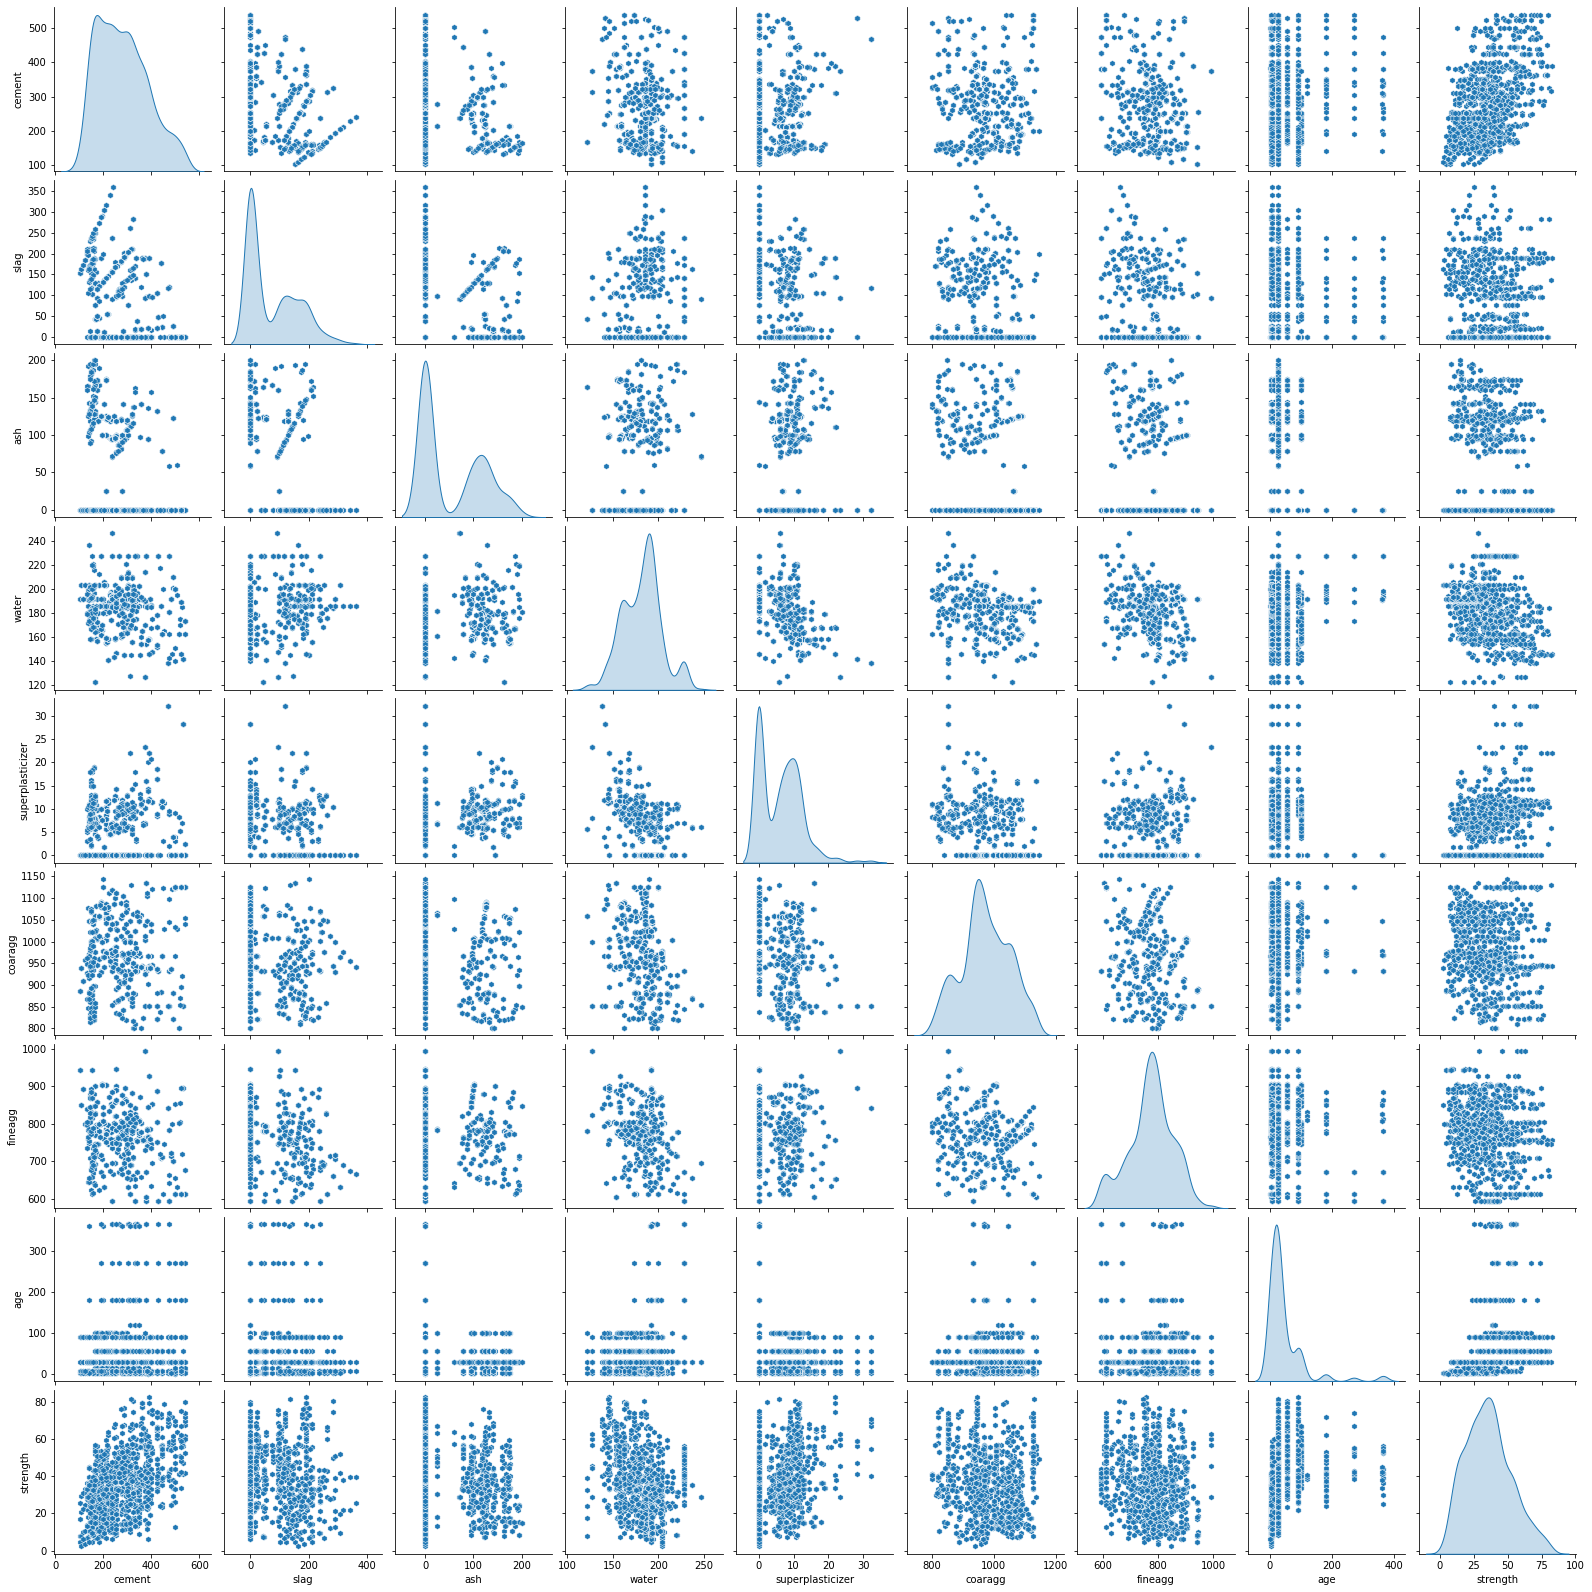

In [10]:
sns.pairplot(renamed_dataset, markers='h', diag_kind= 'kde')

In [11]:
# pairplot可以看出features間的關係
# 數據間沒有很強的相關性（看起來互相獨立）
# 但是 strength vs cement 可以稍微看出cement越大 strength越大

# 現在focus on個別的數據

def plot_data(feature, data):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,5))
    fig.set_size_inches(20, 6)
    sns.distplot(data[feature], ax=ax1, kde=True)
    ax1.tick_params(labelsize=15)
    ax1.set_xlabel(feature, fontsize=15)
    ax1.set_title("Distribution Plot")

    sns.boxplot(x=feature, ax=ax2, data=data)
    ax2.set_title("Box Plot")
    ax2.set_xlabel(feature, fontsize=15)
    
def get_outliter(feature, data):
    feature_data = data[feature]
    Q1 = feature_data.quantile(0.25)
    Q3 = feature_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - IQR * 1.5
    upper_bound = Q3 + IQR * 1.5
    return (upper_bound, lower_bound, IQR)

def outliter_info(feature, data):
    upper_bound, lower_bound, IQR = get_outliter(feature, data)
    print("IQR = " + str(IQR))
    print("LB = " + str(lower_bound))
    print("UB = " + str(upper_bound))
    print("data count below than lower bound = {}".format(data[data[feature] < lower_bound][feature].count()))
    print("data count bigger than uppper bound = {}".format(data[data[feature] > upper_bound][feature].count()))



IQR = 157.625
LB = -44.0625
UB = 586.4375
data count below than lower bound = 0
data count bigger than uppper bound = 0


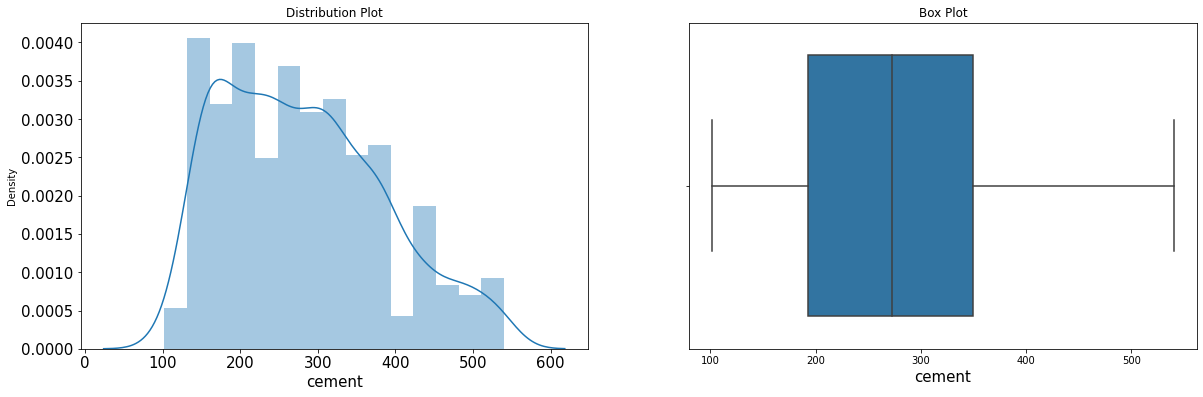

In [12]:
# cement
feature = 'cement'
plot_data(feature, renamed_dataset)
outliter_info(feature, renamed_dataset)

IQR = 142.95
LB = -214.42499999999998
UB = 357.375
data count below than lower bound = 0
data count bigger than uppper bound = 2


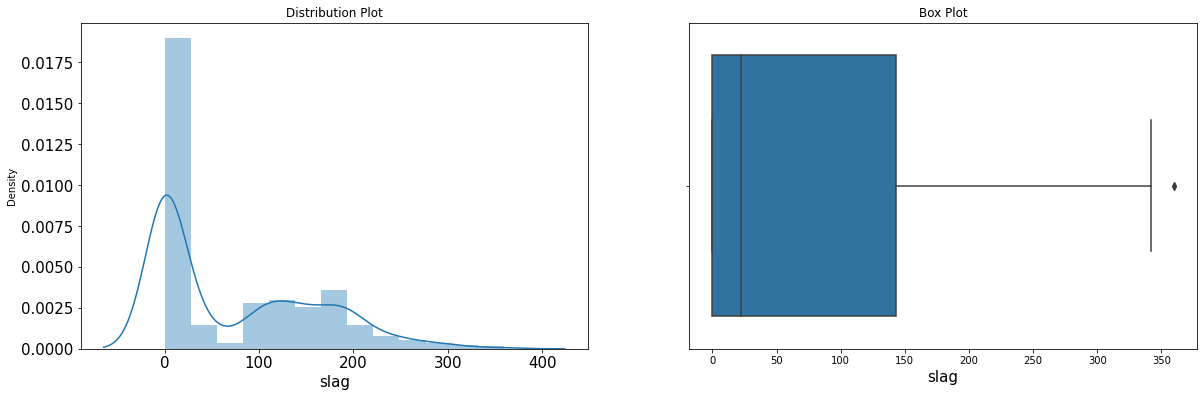

In [13]:
# slag
feature = 'slag'
plot_data(feature, renamed_dataset)
outliter_info(feature, renamed_dataset)

IQR = 118.3
LB = -177.45
UB = 295.75
data count below than lower bound = 0
data count bigger than uppper bound = 0


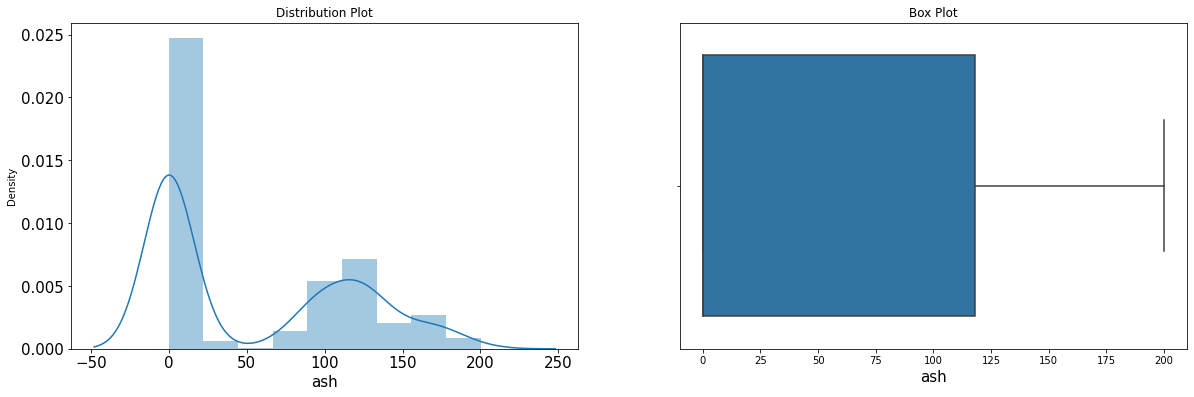

In [14]:
# ash
feature = 'ash'
plot_data(feature, renamed_dataset)
outliter_info(feature, renamed_dataset)

IQR = 27.099999999999994
LB = 124.25000000000001
UB = 232.64999999999998
data count below than lower bound = 5
data count bigger than uppper bound = 4


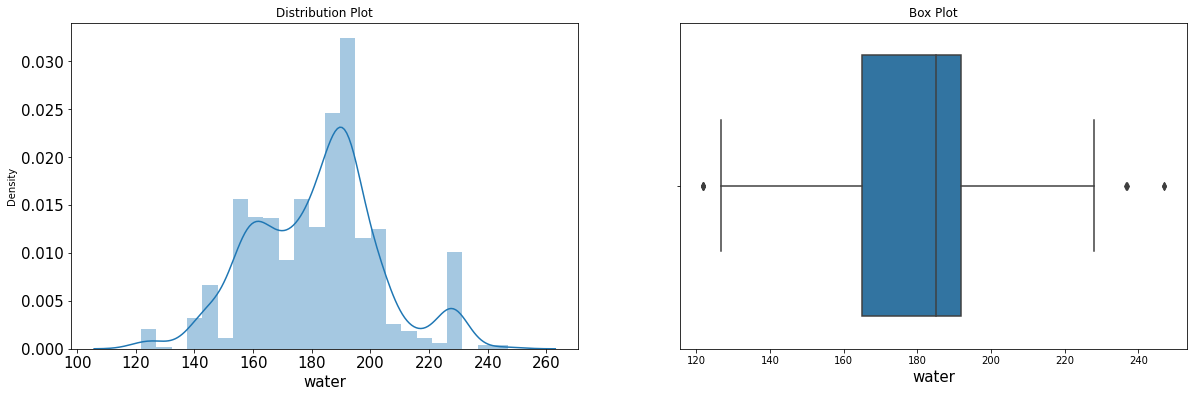

In [15]:
# water
feature = 'water'
plot_data(feature, renamed_dataset)
outliter_info(feature, renamed_dataset)

IQR = 10.2
LB = -15.299999999999999
UB = 25.5
data count below than lower bound = 0
data count bigger than uppper bound = 10


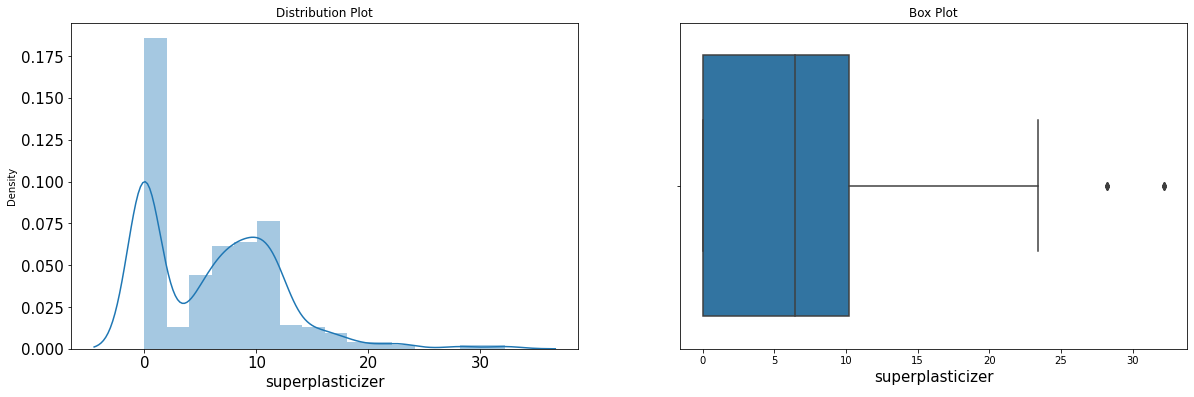

In [16]:
# superplasticizer
feature = 'superplasticizer'
plot_data(feature, renamed_dataset)
outliter_info(feature, renamed_dataset)

IQR = 97.40000000000009
LB = 785.8999999999999
UB = 1175.5000000000002
data count below than lower bound = 0
data count bigger than uppper bound = 0


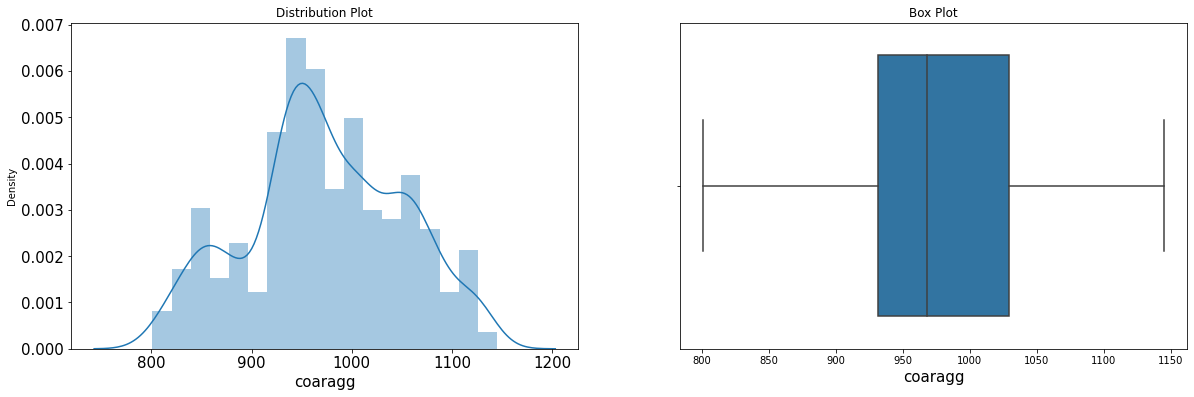

In [17]:
# coaragg
feature = 'coaragg'
plot_data(feature, renamed_dataset)
outliter_info(feature, renamed_dataset)

IQR = 93.04999999999995
LB = 591.3750000000001
UB = 963.5749999999999
data count below than lower bound = 0
data count bigger than uppper bound = 5


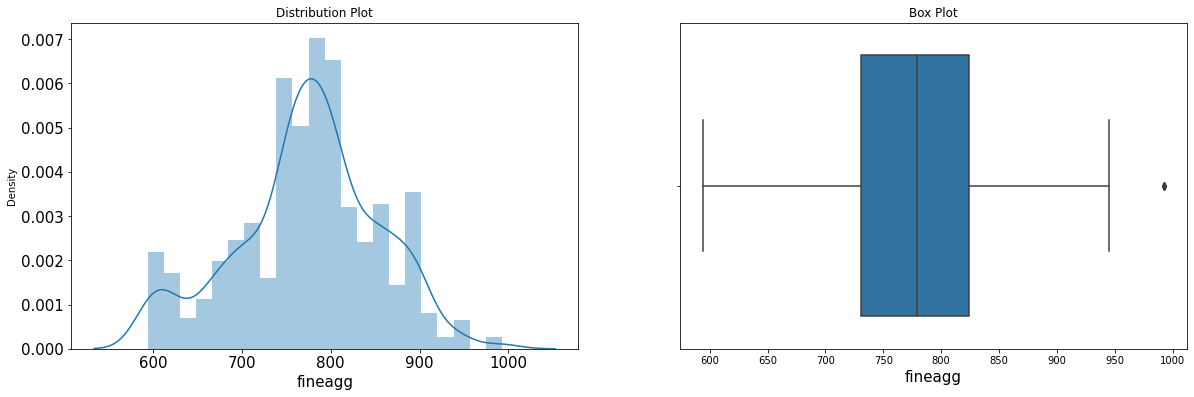

In [18]:
# fineagg
feature = 'fineagg'
plot_data(feature, renamed_dataset)
outliter_info(feature, renamed_dataset)

IQR = 49.0
LB = -66.5
UB = 129.5
data count below than lower bound = 0
data count bigger than uppper bound = 59


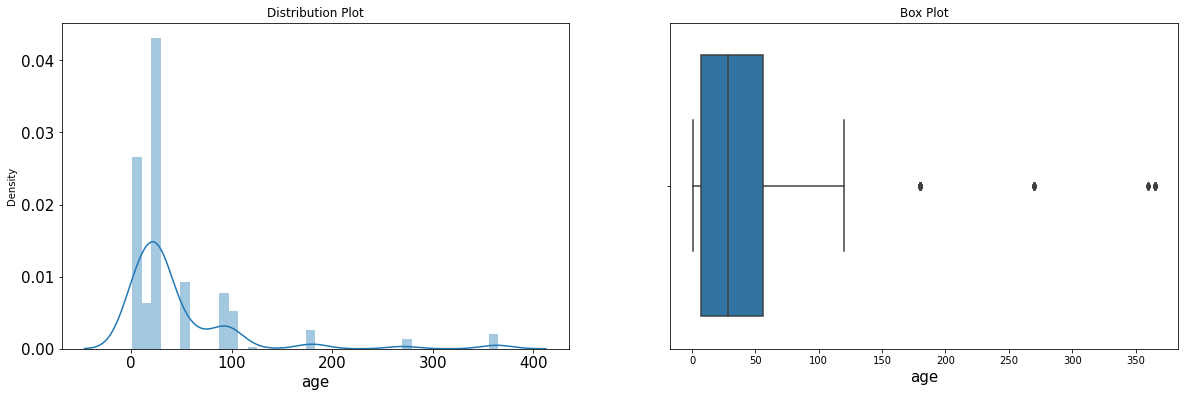

In [19]:
# age
feature = 'age'
plot_data(feature, renamed_dataset)
outliter_info(feature, renamed_dataset)

IQR = 22.425000000000004
LB = -9.927500000000002
UB = 79.77250000000001
data count below than lower bound = 0
data count bigger than uppper bound = 4


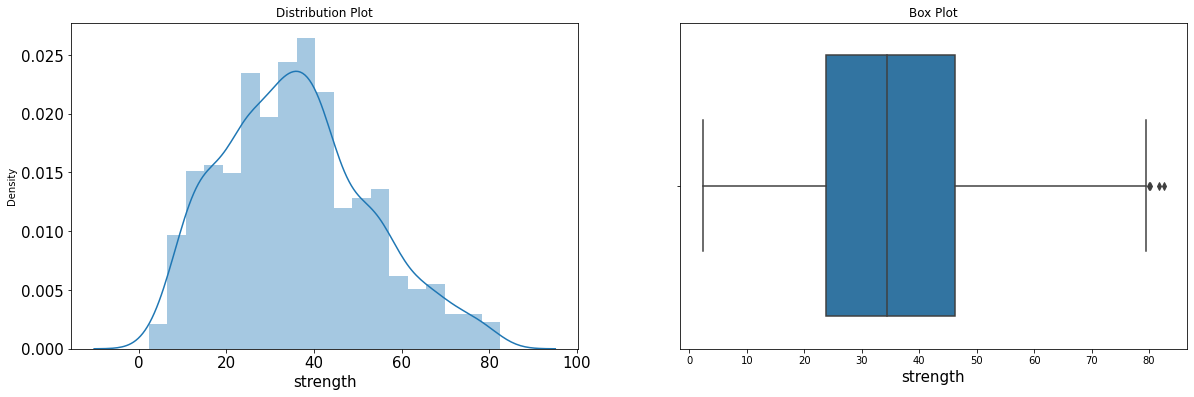

In [20]:
# strength
feature = 'strength'
plot_data(feature, renamed_dataset)
outliter_info(feature, renamed_dataset)

In [21]:
# 從上面各個feature的分佈圖可以容易看出 slag, ash, age, superplasticizer都是right skewed
# 跟一開始單從看統計資料來多了superplasticizer，因此還是必須要把個別的分佈圖都畫出來才能比較準確的看出skewed
# 從各個boxplot(箱型圖)也可以很清楚的看到誰有outlier (slag, water, superplasticizer, fineagg, age, strength)

upper_bound, _, _ = get_outliter('strength', renamed_dataset)

renamed_dataset[renamed_dataset.strength >upper_bound]


# 處理outlier的方法有
# 1.刪除（整欄不用或是整個feature不用）
# 2.補植（用中位數、最大值、最小值取代）
# 開始來處理outlier
# 在這裡簡單用中位數取代
df_copy = renamed_dataset.copy()
for column in df_copy.columns:
    if column == 'strength':
        continue
    upper_bound, lower_bound, _ = get_outliter(column, df_copy)
    series = df_copy[column].loc[(df_copy[column] > upper_bound)|(df_copy[column] < lower_bound)]
    median = df_copy[column].median()
    df_copy[column][series.index] = median

<AxesSubplot:>

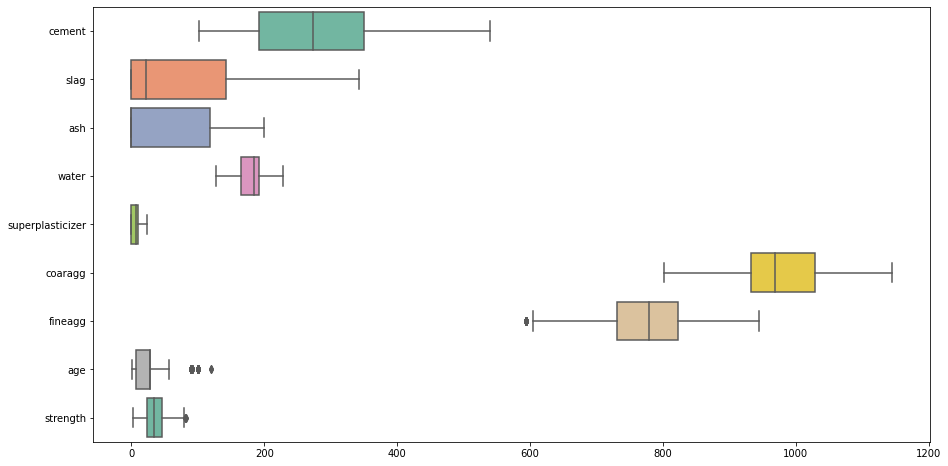

In [22]:
# 檢查一下是否已經清掉outlier
plt.figure(figsize=(15,8))
sns.boxplot(data=df_copy, orient="h", palette="Set2", dodge=False)

In [23]:
# 由上圖可知，其實不是所有的outlier都可以用這樣處理，但因為簡單做所以我們先忽略掉剩下的
# 去掉outliter之後feature間的correlate差別
df_copy.corr()

,cement,slag,ash,water,superplasticizer,coaragg,fineagg,age,strength
cement,1.000000,-0.275046,-0.397467,-0.091614,0.013336,-0.109349,-0.238698,-0.031962,0.497832
slag,-0.275046,1.000000,-0.320468,0.098880,0.061195,-0.283882,-0.282383,-0.028971,0.137800
ash,-0.397467,-0.320468,1.000000,-0.248011,0.447492,-0.009961,0.091729,0.057928,-0.105755
water,-0.091614,0.098880,-0.248011,1.000000,-0.658056,-0.156928,-0.426299,-0.040304,-0.307711
superplasticizer,0.013336,0.061195,0.447492,-0.658056,1.000000,-0.224503,0.156591,0.062013,0.346260
coaragg,-0.109349,-0.283882,-0.009961,-0.156928,-0.224503,1.000000,-0.161377,0.018078,-0.164935
fineagg,-0.238698,-0.282383,0.091729,-0.426299,0.156591,-0.161377,1.000000,0.051532,-0.182186
age,-0.031962,-0.028971,0.057928,-0.040304,0.062013,0.018078,0.051532,1.000000,0.499850
strength,0.497832,0.137800,-0.105755,-0.307711,0.346260,-0.164935,-0.182186,0.499850,1.000000


<AxesSubplot:title={'center':'Correlation of Attributes'}>

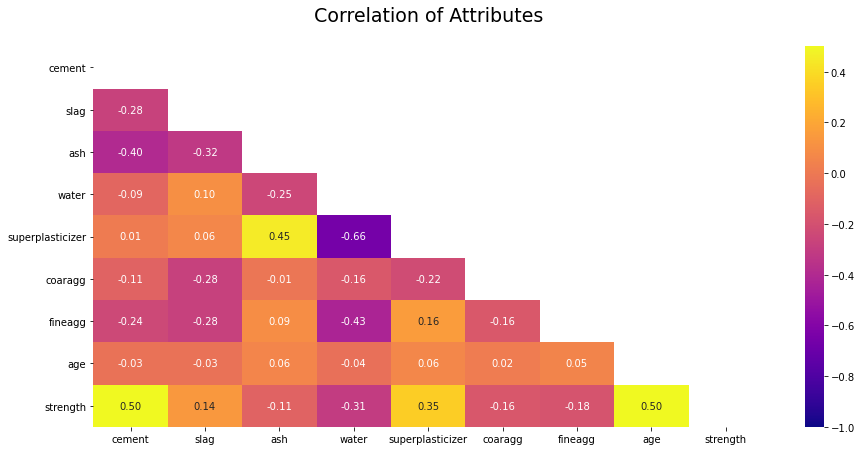

In [24]:
# 從上表可知 slag, age對於strength的關聯性變高了

mask = np.zeros_like(df_copy.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# mask 是用來遮掉右上半邊
plt.figure(figsize=(15,7))
plt.title('Correlation of Attributes', y = 1.05, size = 19)
sns.heatmap(df_copy.corr(), vmin=-1, cmap='plasma', mask = mask, annot=True, fmt='.2f')

In [25]:
cluster_range = range(2, 6)
cluster_errors = []
for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, n_init=5)
    clusters.fit(df_copy)
    lables = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

df_clusters = pd.DataFrame({"num_clusters" : cluster_range, "cluster_errors" : cluster_errors})

df_clusters.head()
    


,num_clusters,cluster_errors
0,2,2.774842e+07
1,3,2.141025e+07
2,4,1.868529e+07
3,5,1.662310e+07


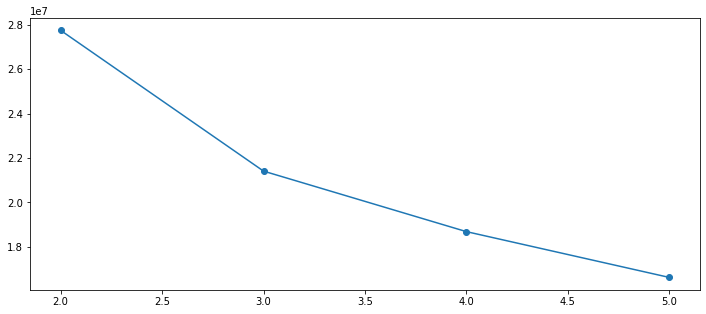

In [26]:
plt.figure(figsize=(12, 5))
plt.plot(df_clusters.num_clusters, df_clusters.cluster_errors, marker='o')

In [27]:
# 從上圖可以看到從n=2到n=3之間的error有很大的落差，而後的落差沒有2~3中間大，所以選n=3來做k mean clustering
cluster = KMeans(n_clusters=3, random_state=2345)
cluster.fit(df_copy)

predict = cluster.predict(df_copy)
df_copy['GROUP'] = predict

df_copy_new = df_copy.copy(deep=True)

In [28]:
centroids = cluster.cluster_centers_
centroids

array([[ 400.69212121,   30.54030303,   26.43212121,  182.32090909,
           5.63090909,  958.83212121,  755.02787879,   30.32424242,
          42.59369697],
       [ 224.20994318,  174.48465909,   33.884375  ,  187.91505682,
           5.32017045,  943.28835227,  747.18636364,   30.20454545,
          35.58485795],
       [ 225.43850575,   11.32471264,  101.04626437,  174.68591954,
           6.95948276, 1016.24827586,  814.8091954 ,   36.1637931 ,
          29.62847701]])

In [29]:
# 作standarazation
# zscore之後，mean = 0 && std = 1
X_scaled = df_copy_new.apply(zscore)
X_scaled.head()

,cement,slag,ash,water,superplasticizer,coaragg,fineagg,age,strength,GROUP
0,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,0.863154,-1.227306,-0.153159,2.645408,-1.254378
1,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,1.056164,-1.227306,-0.153159,1.561421,-1.254378
2,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159,0.266627,-0.021545
3,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159,0.313340,-0.021545
4,-0.790459,0.693195,-0.847144,0.502442,-1.091166,0.070527,0.673158,-0.153159,0.507979,-0.021545


<AxesSubplot:>

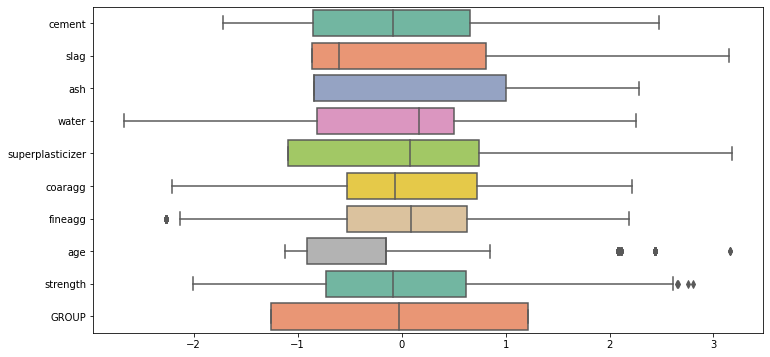

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_scaled, orient='h', palette='Set2', dodge=False)

In [31]:
# 現在開始來建立訓練驗證測試資料

y = X_scaled.strength
X = X_scaled.drop('strength', axis=1)

# 從資料群中8:2拆訓練跟測試
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)
print("x_train_shape = " + str(x_train.shape))
print("x_test_shape = " + str(x_test.shape))

x_train_shape = (824, 9)
x_test_shape = (206, 9)


In [32]:
# 再從訓練資料中取 7:3 拆訓練跟驗證
x_model_train, x_val, y_model_train, y_val = train_test_split(x_train, y_train, test_size=0.30, random_state=7)
print("x_train_shape = " + str(x_model_train.shape))
print("x_val_shape = " + str(x_val.shape))

x_train_shape = (576, 9)
x_val_shape = (248, 9)


In [33]:
n_split = 10
random_state = 7
kfold = KFold(n_splits=n_split, shuffle=True,random_state=random_state)
linear_model = []
linear_model_score = []
linear_model_rmse = []
linear_model_r2 = []
model_total = []
rmse = []
r_sq = []

# Regression comparision

Linear regression

In [34]:
lim = LinearRegression()
lim.fit(x_model_train, y_model_train)
linear_model.append('Linear regression')
# for idx, col_name in enumerate(x_model_train.columns):
#     print('coeffient for {} is {}'.format(col_name, lim.coef_[idx]))

# print('')
# intercept = lim.intercept_
# print('intercept of model is ' + str(intercept))

lr_score = lim.score(x_val, y_val)
linear_model_score.append(lr_score)
print('linear regressioin model score = {}'.format(lr_score))
lr_rmse = np.sqrt((-1) * cross_val_score(lim, x_model_train, y_model_train.ravel(), 
                                       cv= kfold, scoring='neg_mean_squared_error').mean())
print('linear regression model rmse = {}'.format(lr_rmse))
linear_model_rmse.append(lr_rmse)

lr_r2 = cross_val_score(lim, x_model_train, y_model_train.values.ravel(), cv=kfold, scoring='r2').mean()
print('linear regression r-square = {}'.format(lr_r2))

linear_model_r2.append(lr_r2)

linear regressioin model score = 0.7068180082921781
linear regression model rmse = 0.5429955329702516
linear regression r-square = 0.6738028213550853


Polynomial regression

In [35]:
poly_2 = PolynomialFeatures(degree=2, interaction_only=True)
x_poly_2_train = poly_2.fit_transform(x_model_train)
x_poly_2_val = poly_2.fit_transform(x_val)
linear_model.append('2d Polynomial regression')

poly_2 = LinearRegression()
poly_2.fit(x_poly_2_train, y_model_train)
pf_2_score = poly_2.score(x_poly_2_val, y_val)
print("2d Polynomial score = {}".format(pf_2_score))
linear_model_score.append(pf_2_score)

pf_2_rmse = np.sqrt((-1) * cross_val_score(poly_2, x_poly_2_train, y_model_train.ravel(), 
                  cv=kfold, scoring ='neg_mean_squared_error').mean())
print("2d Polynomial model rmse :", pf_2_rmse)
linear_model_rmse.append(pf_2_rmse)

pf_2_r2 = cross_val_score(poly_2, x_poly_2_train, y_model_train.ravel(), cv=kfold, scoring ='r2').mean()
print("2d Polynomial model r-square :", pf_2_r2)
linear_model_r2.append(pf_2_r2)

2d Polynomial score = 0.7395301106380161
2d Polynomial model rmse : 0.5056712469680275
2d Polynomial model r-square : 0.7223339858143276


Polynomial regression (3D)

In [36]:
poly_3 = PolynomialFeatures(degree=3, interaction_only=True)
x_poly_3_train = poly_3.fit_transform(x_model_train)
x_poly_3_val = poly_3.fit_transform(x_val)
linear_model.append('3d Polynomial regression')

poly_3 = LinearRegression()
poly_3.fit(x_poly_3_train, y_model_train)
pf_3_score = poly_3.score(x_poly_3_val, y_val)
print("3d Polynomial score = {}".format(pf_3_score))
linear_model_score.append(pf_3_score)

pf_3_rmse = np.sqrt((-1) * cross_val_score(poly_3, x_poly_3_train, y_model_train.ravel(), 
                  cv=kfold, scoring ='neg_mean_squared_error').mean())
print("3d Polynomial model rmse =", pf_3_rmse)
linear_model_rmse.append(pf_3_rmse)

pf_3_r2 = cross_val_score(poly_3, x_poly_3_train, y_model_train.ravel(), cv=kfold, scoring ='r2').mean()
print("3d Polynomial model r-square =", pf_3_r2)
linear_model_r2.append(pf_3_r2)

3d Polynomial score = 0.7309938789622428
3d Polynomial model rmse = 0.5486933939516675
3d Polynomial model r-square = 0.6746504145669545


Ridge (L2 regularization)

In [37]:
# lambda = .3
ridge = Ridge(alpha=.3)
ridge.fit(x_model_train, y_model_train)

print('l2 gen weight = ', ridge.coef_)

linear_model.append('l2 with gerneal data')
ridge_score = ridge.score(x_val, y_val)
print('l2 gen score = ', ridge_score)
linear_model_score.append(ridge_score)
ridge_rmse = np.sqrt((-1) * cross_val_score(ridge, x_model_train, y_model_train.ravel(),
                    cv = kfold, scoring = 'neg_mean_squared_error').mean())
linear_model_rmse.append(ridge_rmse)
print('l2 gen rmse = ', ridge_rmse)
ridge_r2 = cross_val_score(ridge, x_model_train, y_model_train.ravel(),
                          cv = kfold, scoring='r2').mean()

print('l2 gen r-square = ', ridge_r2)
linear_model_r2.append(ridge_r2)
print('')

ridge_p2 = Ridge(alpha=.3)
ridge_p2.fit(x_poly_2_train, y_model_train)

print('l2 2d weight = ', ridge_p2.coef_)

linear_model.append('l2 with 2d Polynomial')
ridge_p2_score = ridge_p2.score(x_poly_2_val, y_val)
linear_model_score.append(ridge_p2_score)
print("l2 2d Score:",ridge_p2_score)
ridge_p2_rmse = np.sqrt((-1) * cross_val_score(ridge_p2, x_poly_2_train, y_model_train.values.ravel()
                                               , cv=kfold, scoring='neg_mean_squared_error').mean())
print("l2 2d rmse :", ridge_p2_rmse)
linear_model_rmse.append(ridge_p2_rmse)
ridge_p2_r2 = cross_val_score(ridge_p2, x_poly_2_train, y_model_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("l2 2d r-square Value :",ridge_p2_r2)
linear_model_r2.append(ridge_p2_r2)



l2 gen weight =  [ 0.59253553  0.3084052   0.10672869 -0.28110684  0.03398708 -0.10628032
 -0.15925885  0.50620043  0.04639724]
l2 gen score =  0.7068005660206014
l2 gen rmse =  0.5429838382108447
l2 gen r-square =  0.6738616409003841

l2 2d weight =  [ 0.          0.72235965  0.46420828  0.19026681 -0.27941832  0.04770539
 -0.07091989 -0.09698683  0.48957457  0.12598119  0.07221222  0.13243269
 -0.26500499 -0.06365254  0.10439682  0.12161887  0.1415086   0.06294428
  0.14288684 -0.18742629 -0.08238071  0.03087599  0.13935161  0.21377004
  0.09767249 -0.30366544 -0.20583296  0.01611704  0.09514745  0.13243903
  0.07000275  0.04797093 -0.1652689  -0.10636634 -0.06771742 -0.00131221
 -0.07270063 -0.05825587 -0.06098613  0.05672781  0.03180727  0.02158018
  0.06746103  0.08736376  0.09500595  0.0236779 ]
l2 2d Score: 0.7394351261174996
l2 2d rmse : 0.5051961440159383
l2 2d r-square Value : 0.722924541286461


Lasso (L1 regularization)

In [38]:
# lambda = .3
lasso = Lasso(alpha=.3)
lasso.fit(x_model_train, y_model_train)

print('l1 gen weight = ', lasso.coef_)

linear_model.append('l1 with gerneal data')
lasso_score = lasso.score(x_val, y_val)
print('l1 gen score = ', lasso_score)
linear_model_score.append(lasso_score)
lasso_rmse = np.sqrt((-1) * cross_val_score(lasso, x_model_train, y_model_train.ravel(),
                    cv = kfold, scoring = 'neg_mean_squared_error').mean())
linear_model_rmse.append(lasso_rmse)
print('l1 gen rmse = ', lasso_rmse)
lasso_r2 = cross_val_score(lasso, x_model_train, y_model_train.ravel(),
                          cv = kfold, scoring='r2').mean()

print('l1 gen r-square = ', lasso_r2)
linear_model_r2.append(lasso_r2)
print('')
#----------------------------------------------------
lasso_p2 = Lasso(alpha=.3)
lasso_p2.fit(x_poly_2_train, y_model_train)

print('l1 2d weight = ', lasso_p2.coef_)

linear_model.append('l1 with 2d Polynomial')
lasso_p2_score = lasso_p2.score(x_poly_2_val, y_val)
linear_model_score.append(lasso_p2_score)
print("l1 2d Score:",lasso_p2_score)
lasso_p2_rmse = np.sqrt((-1) * cross_val_score(lasso_p2, x_poly_2_train, y_model_train.values.ravel()
                                               , cv=kfold, scoring='neg_mean_squared_error').mean())
print("l1 2d rmse :", lasso_p2_rmse)
linear_model_rmse.append(lasso_p2_rmse)
lasso_p2_r2 = cross_val_score(lasso_p2, x_poly_2_train, y_model_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("l1 2d r-square Value :",lasso_p2_r2)
linear_model_r2.append(lasso_p2_r2)

l1 gen weight =  [ 0.19227176  0.         -0.         -0.          0.00095131 -0.
 -0.          0.19430287 -0.        ]
l1 gen score =  0.32074068687931623
l1 gen rmse =  0.8213474073308104
l1 gen r-square =  0.30356642615385665

l1 2d weight =  [ 0.          0.19227176  0.         -0.         -0.          0.00095131
 -0.         -0.          0.19430287 -0.          0.         -0.
 -0.          0.         -0.          0.         -0.         -0.
 -0.         -0.          0.         -0.          0.          0.
  0.          0.         -0.          0.          0.         -0.
  0.         -0.          0.         -0.         -0.          0.
 -0.          0.          0.         -0.         -0.          0.
  0.          0.         -0.          0.        ]
l1 2d Score: 0.32074068687931623
l1 2d rmse : 0.8213474073308104
l1 2d r-square Value : 0.30356642615385665


In [39]:
models_compard_df = pd.DataFrame({'Model' : linear_model, 
                                  'score' : linear_model_score, 
                                  'rmse' : linear_model_rmse, 
                                  'r_squre' : linear_model_r2})
# linear_model_rmse
models_compard_df

,Model,score,rmse,r_squre
0,Linear regression,0.706818,0.542996,0.673803
1,2d Polynomial regression,0.739530,0.505671,0.722334
2,3d Polynomial regression,0.730994,0.548693,0.674650
3,l2 with gerneal data,0.706801,0.542984,0.673862
4,l2 with 2d Polynomial,0.739435,0.505196,0.722925
5,l1 with gerneal data,0.320741,0.821347,0.303566
6,l1 with 2d Polynomial,0.320741,0.821347,0.303566


In [40]:
# 找出表現最好的 regression model
models_compard_df[(models_compard_df.rmse == models_compard_df.rmse.min()) & (models_compard_df.r_squre == models_compard_df.r_squre.max())]

,Model,score,rmse,r_squre
4,l2 with 2d Polynomial,0.739435,0.505196,0.722925


# Random Forest

In [41]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_model_train, y_model_train)
print('random forest')

rf_train_score = rf.score(x_model_train, y_model_train)
print('random forest on trainning set', rf_train_score)

rf_val_score = rf.score(x_val, y_val)
print('random forest on val set', rf_val_score)

rf_rmse = np.sqrt((-1) * cross_val_score(rf, x_model_train, y_model_train, 
                                         cv= kfold, scoring='neg_mean_squared_error').mean())

print('random forest with rmse', rf_rmse)

rf_r2 =  cross_val_score(rf, x_model_train, y_model_train, 
                                         cv= kfold, scoring='r2').mean()

print('random forest with r2', rf_r2)

model_rf_df = pd.DataFrame({'tr_score' : [rf_train_score],
                            'val_score' : [rf_val_score], 
                            'rmse' : rf_rmse, 
                            'r-square' : rf_r2})

model_rf_df

random forest
random forest on trainning set 0.9793110565652414
random forest on val set 0.8947989137822588
random forest with rmse 0.3727600000274936
random forest with r2 0.8544781882505834


,tr_score,val_score,rmse,r-square
0,0.979311,0.894799,0.37276,0.854478


In [42]:
rf_test = rf.score(x_test, y_test)
print('random forest with test set', rf_test)

random forest with test set 0.9117239471709686


# Hyper - tuning Random forest

RandomSearchCV

In [43]:
hy_rf = RandomForestRegressor(random_state=7)
print('parameter currently in use :\n')
pprint(hy_rf.get_params())

parameter currently in use :

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 7,
 'verbose': 0,
 'warm_start': False}


In [44]:
bootstrap = [True, False]
max_depth = [int(x) for x in np.linspace(5, 10, 2)]
max_depth.append(None)
max_features = ['auto', 'log2']
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
n_estimators = [int(x) for x in np.linspace(10, 100, 3)]

para_random = {'n_estimators' : n_estimators,
               'max_features': max_features,
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split, 
               'min_samples_leaf': min_samples_leaf, 
               'bootstrap' : bootstrap}

pprint(para_random)


{'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 55, 100]}


In [45]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=para_random, n_iter=5,
                              scoring='neg_mean_absolute_error', cv=kfold, verbose=2, random_state=7,
                              n_jobs=-1, return_train_score=True)

rf_random.fit(x_model_train, y_model_train.values.ravel())


Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, None],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 55, 100]},
                   random_state=7, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [46]:
rf_random_estimator = rf_random.best_estimator_
rf_random_estimator.fit(x_model_train, y_model_train)
print('random forest regressor')
rf_random_estimator_score = rf_random_estimator.score(x_model_train, y_model_train)
print('random forest with training set =', rf_random_estimator_score)
rf_random_estimator_val_score = rf_random_estimator.score(x_val, y_val)
print('random forest with val set =', rf_random_estimator_val_score)

rf_random_estimator_rmse = np.sqrt((-1) * cross_val_score(rf_random_estimator, x_model_train, y_model_train, 
                                                          cv=kfold, scoring='neg_mean_squared_error').mean())
print('random forest rmse =', rf_random_estimator_rmse)
rf_random_estimator_r2 =  cross_val_score(rf_random_estimator, x_model_train, y_model_train, 
                                         cv= kfold, scoring='r2').mean()

print('random forest with r2', rf_random_estimator_r2)

model_rf_estimator_df = pd.DataFrame({'tr_score' : [rf_random_estimator_score],
                            'val_score' : [rf_random_estimator_val_score], 
                            'rmse' : rf_random_estimator_rmse, 
                            'r-square' : rf_random_estimator_r2})

model_rf_estimator_df

random forest regressor
random forest with training set = 0.9227128206196901
random forest with val set = 0.8581075585402621
random forest rmse = 0.40615865289428704
random forest with r2 0.8293146681512973


,tr_score,val_score,rmse,r-square
0,0.922713,0.858108,0.406159,0.829315


GridSearchCV

In [47]:
para_grid = {'bootstrap': [True],
             'max_depth': [10],
             'max_features': ['log2'],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [5,10],
             'n_estimators': np.arange(50, 71)}

rf_grid = RandomForestRegressor(random_state=7)
grid_search = GridSearchCV(estimator=rf_grid, param_grid=para_grid, cv=kfold, n_jobs=-1, verbose=0, 
                           return_train_score=True)

grid_search.fit(x_model_train, y_model_train)
grid_search.best_params_



{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 64}

In [48]:
rf_grid_esimator = grid_search.best_estimator_
rf_grid_esimator.fit(x_model_train, y_model_train.values.ravel())

print('random forest')

rf_grid_score = rf_grid_esimator.score(x_model_train, y_model_train)

print('random forest with training set =', rf_grid_score)

rf_grid_val_score = rf_grid_esimator.score(x_val, y_val)

print('random forest with val set =', rf_grid_val_score)

rf_grid_rmse = np.sqrt((-1) * cross_val_score(rf_grid_esimator, x_model_train, y_model_train, cv=kfold,
                                             scoring='neg_mean_squared_error').mean())

print('random forest rmse =', rf_grid_rmse)

rf_grid_r2 =  cross_val_score(rf_grid_esimator, x_model_train, y_model_train, 
                                         cv= kfold, scoring='r2').mean()
print('random forest with r2', rf_grid_r2)

model_rf_grid_estimator_df = pd.DataFrame({'tr_score' : [rf_grid_score],
                            'val_score' : [rf_grid_val_score], 
                            'rmse' : rf_grid_rmse, 
                            'r-square' : rf_grid_r2})

model_rf_grid_estimator_df



random forest
random forest with training set = 0.9538186099593667
random forest with val set = 0.8853363641087941
random forest rmse = 0.3831699347187882
random forest with r2 0.8496082774113354


,tr_score,val_score,rmse,r-square
0,0.953819,0.885336,0.38317,0.849608


# 所有model的表現對照

In [49]:
def input_scores(name, model_inputed, x, y):
    model_total.append(name)
    rmse.append(np.sqrt((-1) * cross_val_score(model_inputed, x, y, cv=kfold,
                                         scoring='neg_mean_squared_error').mean()))
    r_sq.append(cross_val_score(model_input, x, y, cv=kfold,
                                         scoring='r2').mean())

In [50]:
names = ['Linear Regression', 'Polynomial 2D', 'Polynomial 3D', 
         'Ridge Regression', 'Lasso Regression',
         'Random Forest', 'Random Forest GridSearchCV', 'Random Forest RandomSearchCV', 
         '']
models = [lim, poly_2, poly_3,
          ridge, lasso,
          rf, rf_grid_esimator,
          rf_random_estimator]

#Running all algorithms
for name, model_input in zip(names, models):
    input_scores(name, model_input, x_model_train, y_model_train.values.ravel())

In [51]:
compare_model_df = pd.DataFrame({'model': model_total,
                           'rmse': rmse,
                           'r_squard': r_sq})
compare_model_df

,model,rmse,r_squard
0,Linear Regression,0.542996,0.673803
1,Polynomial 2D,0.542996,0.673803
2,Polynomial 3D,0.542996,0.673803
3,Ridge Regression,0.542984,0.673862
4,Lasso Regression,0.821347,0.303566
5,Random Forest,0.375501,0.855455
6,Random Forest GridSearchCV,0.383170,0.849608
7,Random Forest RandomSearchCV,0.411296,0.824331


In [52]:
# 找出最好的model
compare_model_df[(compare_model_df.rmse == compare_model_df.rmse.min()) 
                 & (compare_model_df.r_squard == compare_model_df.r_squard.max())]

,model,rmse,r_squard
5,Random Forest,0.375501,0.855455


# 用在test data上來做預測

In [53]:
values = X_scaled.values

n_iterations = 1000              
n_size = int(len(X_scaled) * 1)   

stats = list()   

for i in range(n_iterations):

    train = resample(values, n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])

    rf_ = RandomForestRegressor(n_estimators=100)  
    rf_.fit(train[:,:-1], train[:,-1])  

    rf_.fit(train[:,:-1], train[:,-1])  
    y_test = test[:,-1]  


    predictions = rf_.predict(test[:, :-1])  
    score = rf_.score(test[:, :-1] , y_test)

    stats.append(score)

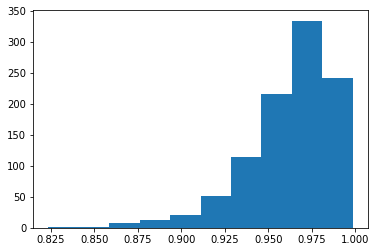

95.0 confidence interval 89.8% and 99.4%


In [55]:
plt.hist(stats)
plt.show()
alpha = 0.95               
p = ((1.0-alpha)/2.0) * 100 
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))